<a href="https://colab.research.google.com/github/angrybird05/pyTorch/blob/main/PyTorch_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
# Pytorch workflow
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt
import numpy as np

In [55]:
#create known parameter
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight*X+bias # Regressin formula

X[:9],y[:9]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120]]))

In [56]:
len(X),len(y)

(50, 50)

In [57]:
 #Create a train/test split
train_split = int(0.8*len(X))
X_train,y_train = X[:train_split],y[:train_split]
X_test,y_test = X[train_split:],y[train_split:]

len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

In [58]:
## visualizing the data
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  #plots traning data,test data ,compare predictions
  plt.figure(figsize=(10,7))
  #plot traning data in blue
  plt.scatter(train_data,train_labels,c="b",s=4,label="Traning data")
  #plot test data in green
  plt.scatter(test_data,test_labels,c="g",s=4,label="Test data")
  #are there any predictoins
  if predictions is not None:
    #plot predictions in red
    plt.scatter(test_data,predictions,c="r",s=4,label="Predictions")
    #Show the lengend
    plt.legend(prop={"size":14})




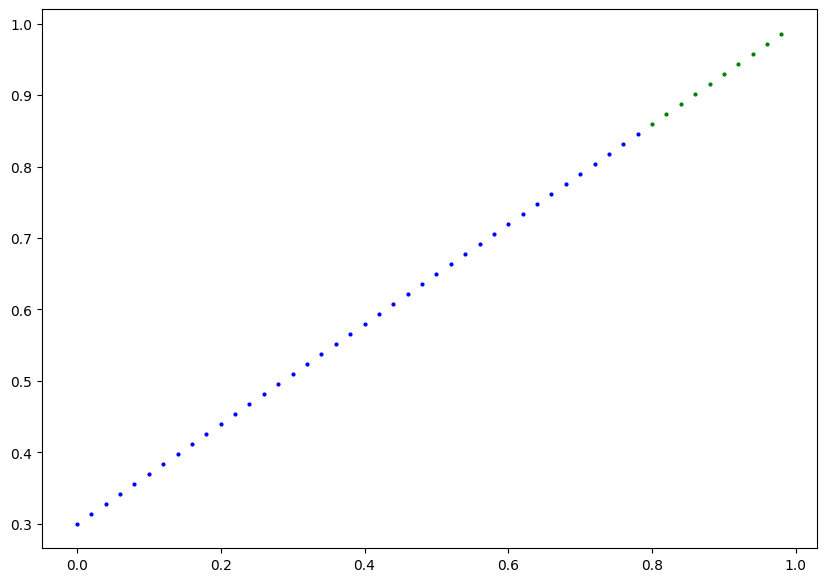

In [59]:
plot_predictions()

In [60]:
#creating linear reresstion model
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    #initializing model parameters
    self.weights = nn.Parameter(torch.randn(1,requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,requires_grad=True,
                                         dtype=torch.float))
  #Forward method to define the computation in model
  def forward(self,x:torch.Tensor)->torch.Tensor:
    return self.weights*x+self.bias

In [61]:
# checking the contents of model (inside the model)

#create randon seed
torch.manual_seed(42)
model_0 = LinearRegressionModel()
# checking out parameters
list(model_0.parameters())


#list named parameters
list(model_0.state_dict().items())

[('weights', tensor([0.3367])), ('bias', tensor([0.1288]))]

In [62]:
#making predictions with model
with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds


tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

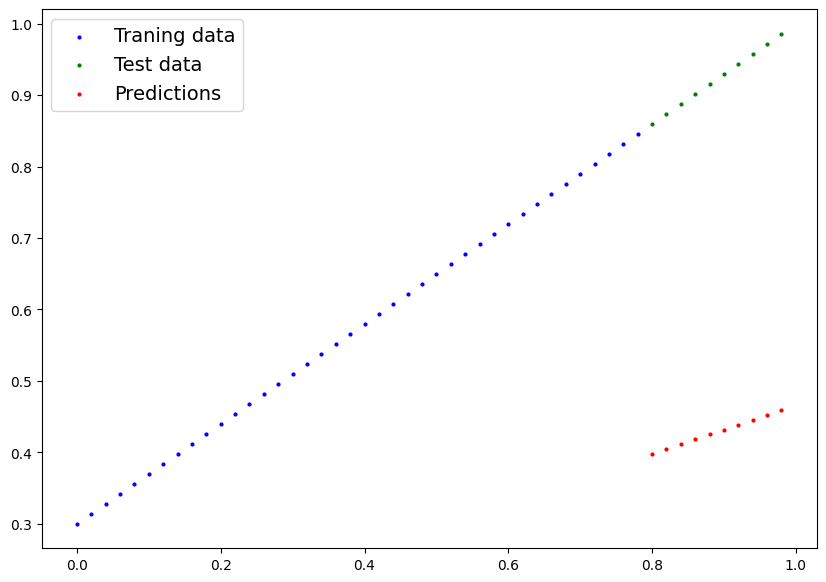

In [63]:
plot_predictions(predictions=y_preds)

In [64]:
## setup loss function

loss_fn = nn.L1Loss()


# setup optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr=0.01)




In [65]:
## setup loss function
loss_fn = nn.L1Loss()

# setup optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr=0.01)


torch.manual_seed(42)
#traning the model
epochs = 200

#Track different values

epoch_count = []
loss_values = []
test_loss_values = []



## looping through data
for i in range (epochs):
  #set the model to traning mode
  model_0.train()
  #1.Forward pass
  y_preds = model_0(X_train)

  #2.calculate the loss
  loss = loss_fn(y_preds,y_train)

  # print(f"loss is {loss}")

  #3.optimizer zero grad
  optimizer.zero_grad()

  #4.perform backtracking the loss with respect to parameters
  loss.backward()

  #5.step the optimizer (performing gradient descent)

  optimizer.step()





  ## Testing the model

  model_0.eval()# turns off differernt settings in the model that are not needed for evaluation/testing time
  with torch.inference_mode():#turns off gradiant tracking

    #1.Forward pass for testing mood
    test_pred = model_0(X_test)

    #2.calculate the loss
    test_loss = loss_fn(test_pred,y_test)

    # Populate lists for plotting
    if i % 10 == 0:
        epoch_count.append(i)
        loss_values.append(loss.cpu().item())
        test_loss_values.append(test_loss.cpu().item())

    #3.printing the for every 10 epochs
    if i%10 == 0:
      print(f"Epoch: {i} loss: {loss}")

Epoch: 0 loss: 0.31288138031959534
Epoch: 10 loss: 0.1976713240146637
Epoch: 20 loss: 0.08908725529909134
Epoch: 30 loss: 0.053148526698350906
Epoch: 40 loss: 0.04543796554207802
Epoch: 50 loss: 0.04167863354086876
Epoch: 60 loss: 0.03818932920694351
Epoch: 70 loss: 0.03476089984178543
Epoch: 80 loss: 0.03132382780313492
Epoch: 90 loss: 0.02788739837706089
Epoch: 100 loss: 0.024458957836031914
Epoch: 110 loss: 0.021020207554101944
Epoch: 120 loss: 0.01758546568453312
Epoch: 130 loss: 0.014155393466353416
Epoch: 140 loss: 0.010716589167714119
Epoch: 150 loss: 0.0072835334576666355
Epoch: 160 loss: 0.0038517764769494534
Epoch: 170 loss: 0.008932482451200485
Epoch: 180 loss: 0.008932482451200485
Epoch: 190 loss: 0.008932482451200485


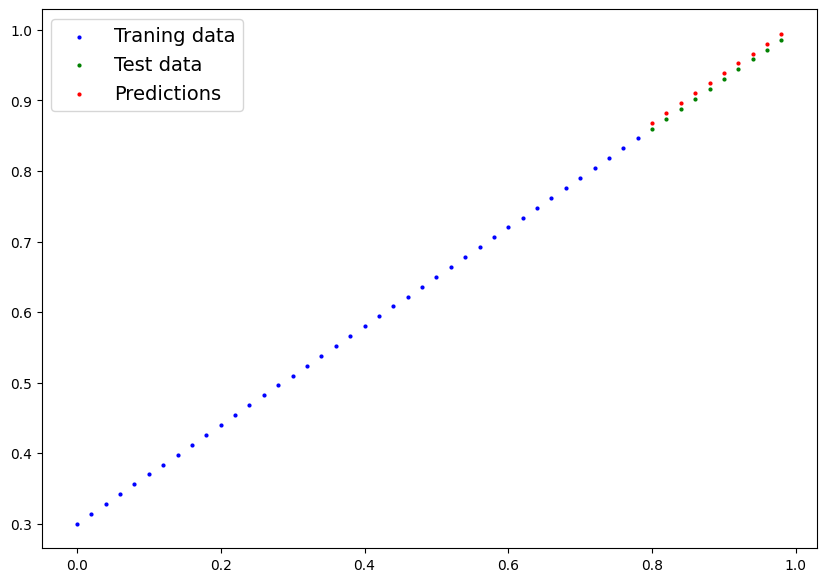

In [66]:
plot_predictions(predictions=test_pred)

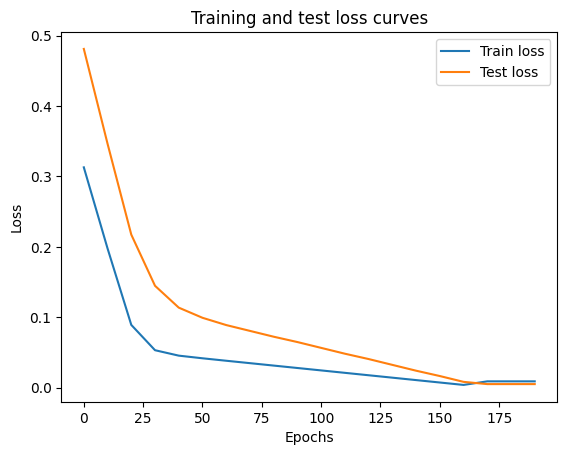

In [67]:
# plot loss curve
plt.plot(epoch_count, np.array(loss_values), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [69]:
# saving the model
from pathlib import Path

#create model directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)

#Create model save path

MODEL_NAME = "01_pytorch_workflow_model.pth"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

#Saving the model sate dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),f=MODEL_SAVE_PATH)




Saving model to: models/01_pytorch_workflow_model.pth


In [70]:
# loading the model
loaded_model_0 = LinearRegressionModel()

#load the saved state dict of model_0
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

loaded_model_0.state_dict()



OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [72]:
#MAKE predictions with loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)
loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [74]:
#compare loaded model preds with orginal model preds
# Recalculate predictions from the trained model_0 on the test set
model_0.eval() # ensure model_0 is in evaluation mode
with torch.inference_mode():
  trained_model_0_preds = model_0(X_test)

# Now compare the predictions from the trained model_0 on X_test with loaded_model_preds
print(trained_model_0_preds == loaded_model_preds)

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])
